# Price Prediction using Regression

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [109]:
#write code here
data = pd.read_csv("data1.csv")
df= data

#### **Task 2: Display first five rows** 

In [110]:
#write code here
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [111]:
#write code here
df= df.drop(["Unnamed: 0"], axis=1)

#### **Task 4: Check the number of rows and columns**

In [112]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [113]:
#write code here
df.dtypes

Index(['insert_date', 'origin', 'destination', 'start_date', 'end_date',
       'train_type', 'price', 'train_class', 'fare'],
      dtype='object')

#### **Task 6: Check summary statistics**

In [114]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [115]:
df.describe(include="all")

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:**
From the dataset above given we can see "price","train_class","fare" have missing values
the column "price" is right skewed 
There are total 5 origins and 
                5 Destinations
                16 train types 
                5 train/ticket clases	
                5 kind of ticket fares
most common origin and destinationis MADRID
most common train type is AVE, 
most common train/ticket class is Turista means turist in english
most common ticke fare is Promo

#### **Task 8: Check null values in dataset**

In [116]:
#write code here
df.isna().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>
*Hint: Take mean*

In [117]:
#write code here
df["price"].fillna(df["price"].mean(), inplace=True)

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [118]:
#write code here
drop_null_train_class_fare = df[ (df['train_class'].isna()== True) | (df['fare'].isna()== True )].index
df.drop(drop_null_train_class_fare , inplace=True)


In [119]:
df.shape

(215266, 9)

#### **Task 11: Drop 'insert_date'**

In [120]:
#write code here
df.drop(["insert_date"], axis=1, inplace=True)

In [121]:
df.shape

(215266, 8)

**Check null values again in dataset**

In [122]:
#write code here
df.isna().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


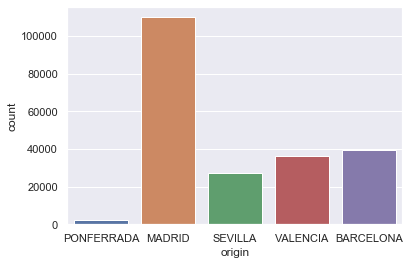

In [123]:
#write code here
sns.countplot(x='origin', data=df);

**Question: What insights do you get from the above plot?**

**Answer:** Most of the people boarded from Madraid. Whereas Barcelona is the second highest rate of people oarding but 3times less than of Madrain then declining the bars in sequential order is Valencia and Sevilla origin. While the least orignated from Ponferrada

#### **Task 13: Plot number of people for the destination stations**


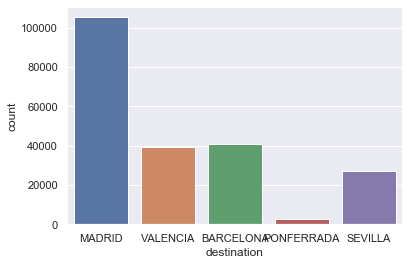

In [124]:
#write code here
sns.countplot(x='destination', data=df);

**Question: What insights do you get from the above graph?**

**Answer:** The most common destination is also MADRID. keeping the stats same as that of origin where Barcelona is the second highest with Valencia, not much difference 3 highest and Sevilla less than Valencia and finally he destination for least people is PONFERRADA.

#### **Task 14: Plot different types of train that runs in Spain**


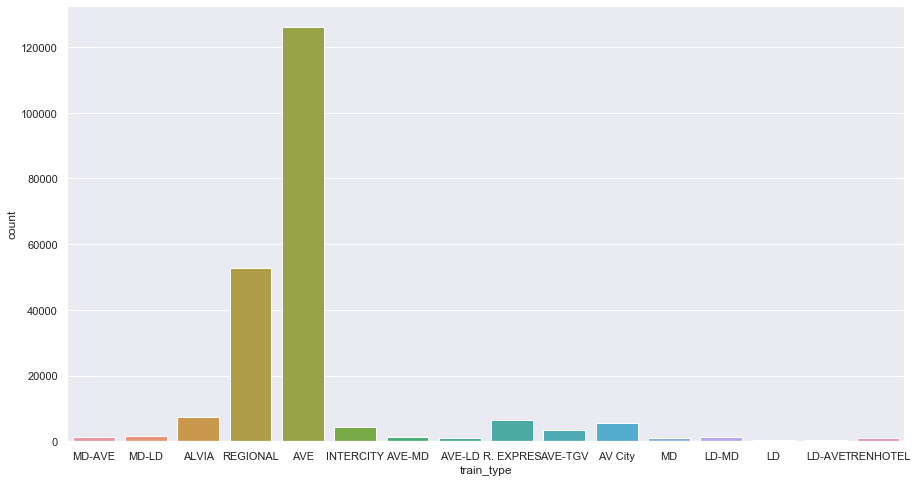

In [125]:
#write code here
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x='train_type', data=df);

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:** AVE runs maimum


#### **Task 15: Plot number of trains of different class**


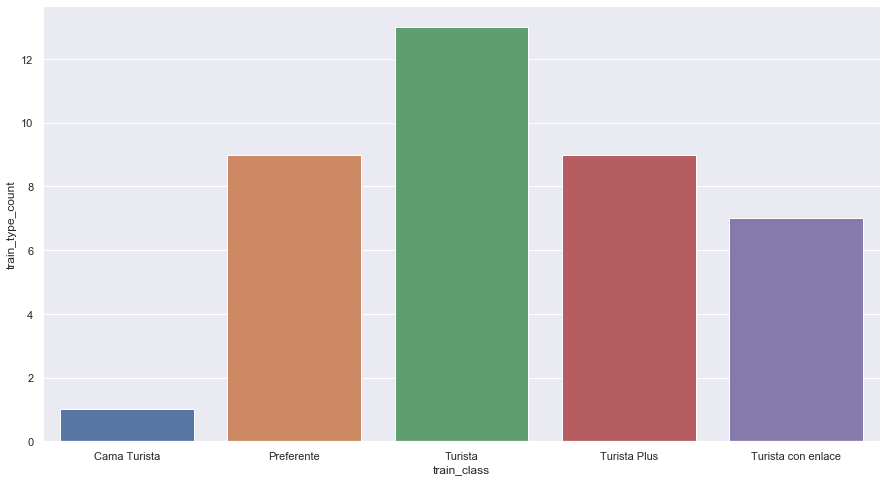

In [126]:
counts_by_class = df.groupby('train_class').agg({'train_type': 'nunique'})
counts_by_class = counts_by_class.reset_index().rename(columns={'train_type': 'train_type_count'})
sns.barplot(x='train_class', data=counts_by_class, y='train_type_count')
plt.show()

**Question: Which the most common train class for traveling among people in general?**

**Answer:** 
Turista i.e.Turists in english

#### **Task 16: Plot number of tickets bought from each category**


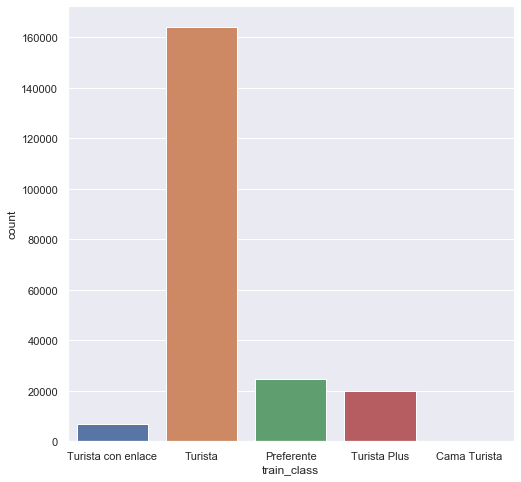

In [129]:
#write code here
sns.set(rc = {'figure.figsize':(8,8)})
sns.countplot(x='train_class', data=df);

**Question: Which the most common tickets are bought?**

**Answer:** Turista means turist is the most common ticket bought.

#### **Task 17: Plot distribution of the ticket prices**

In [130]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\anaconda\lib\site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


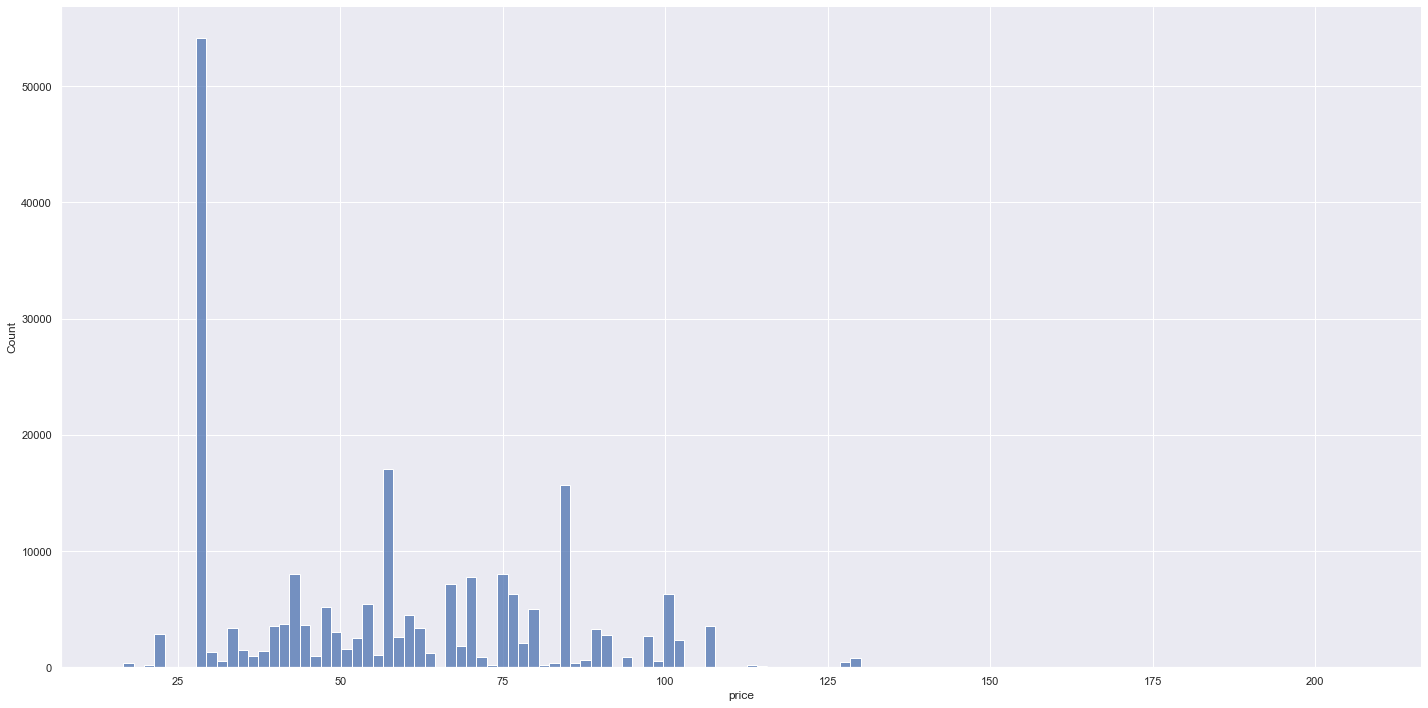

In [131]:
#write code here

sns.displot(data=df, x="price", height= 10, aspect=2)

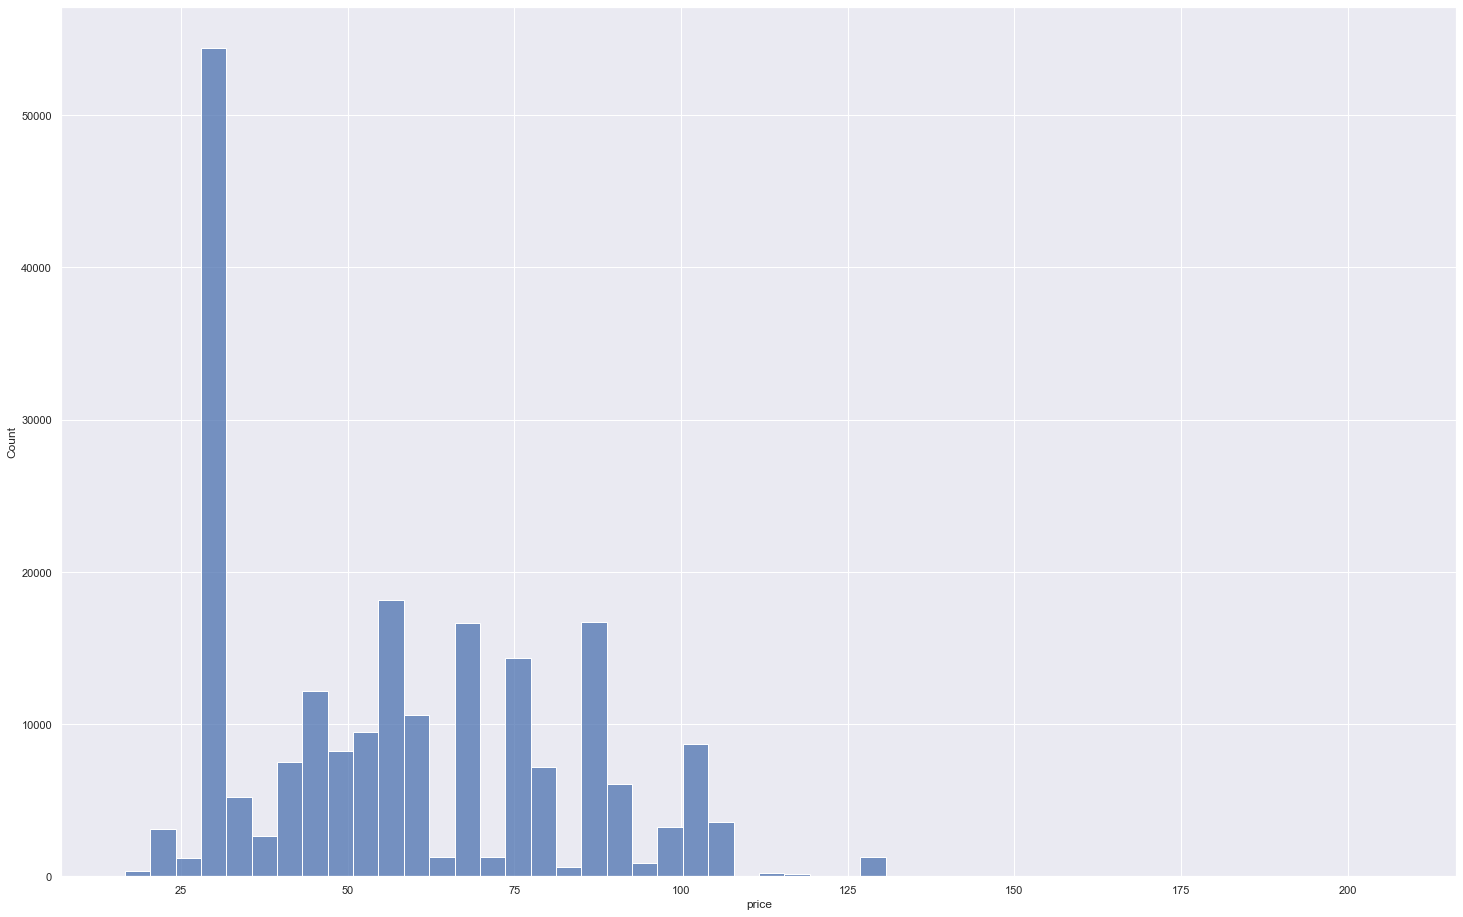

In [44]:
sns.histplot(data=df, x="price", bins=50)

**Question: What readings can you get from the above plot?**

**Answer:**     between 25 to 50 there is a peak of count that shows the ticket price of a certain ticket class which is the most common, it also shows an oulier at 200 and a below 25 which is very few in count however have more count than outlier 200

###### **Task 18: Show train_class vs price through boxplot**

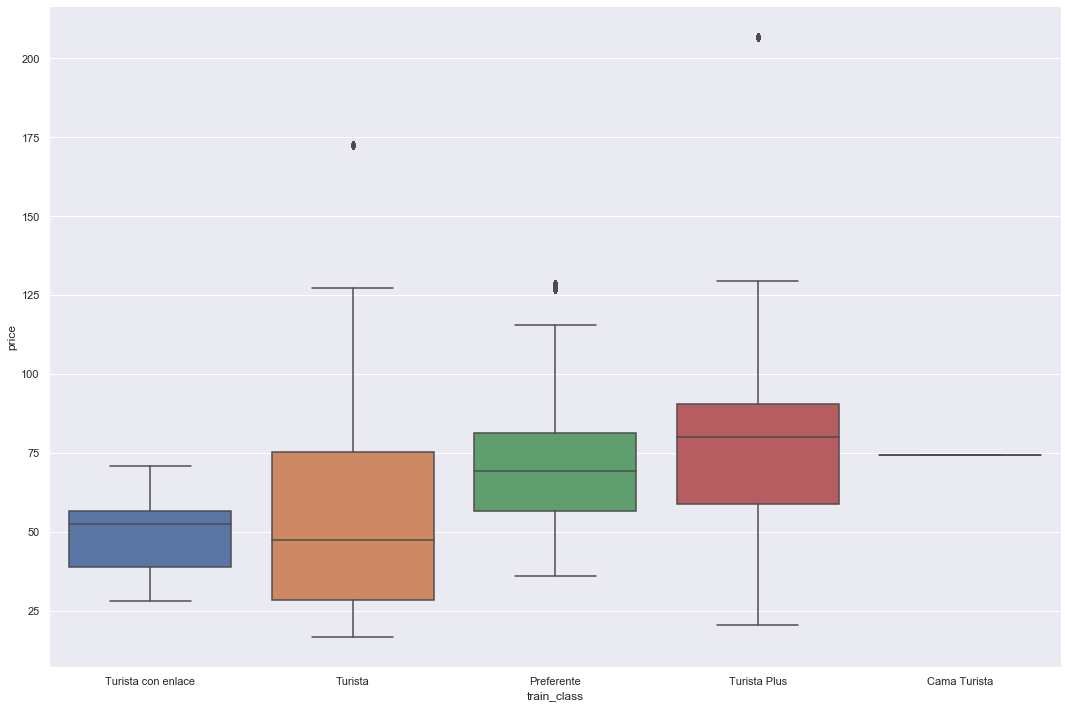

In [132]:
#write code here
sns.set(rc = {'figure.figsize':(10,10)})
sns.catplot(kind='box', x='train_class', y='price', data=df, height=10, aspect=1.5)

In [133]:
df["train_class"].unique()

array(['Turista con enlace', 'Turista', 'Preferente', 'Turista Plus',
       'Cama Turista'], dtype=object)

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:** 
Turista: This is the standard class of travel, with comfortable seating and air conditioning.
The most common train class Turista values are right skewed it also have outliers which shows this train_class ticket price is high maybe on certain dates

Turista Plus: This class offers more space and more comfortable seats than Turista also offering higher price range than that of turista. The box plot also shows left skewness in price and has outliers greater than that of turista so it can be assumed that turista plus also have high price of tickets on certain dates

As per domain knowldge Comfort = 1st class, formerly Turista Plus or Preferente are similar 

Preferente: This class offers comfort and amenities, such as wider seats, more legroom, and complimentary food and drinks. with price range higher than turista but lower than turista plus. also have outliers less than of both turista and turista plus. However distribution seems symmetric

Turista con enlace: This class is for connecting trains, where passengers transfer from one train to another during their journey. It may have slightly different facilities than the regular Turista class. The data is left skewed

Cama Turista: This class is equivalent to a sleeper class, with reclining seats that can be converted into beds for overnight travel. There a just a few instance of Cama Turista The range lies within range of Turista Plus


#### **Task 19: Show train_type vs price through boxplot**


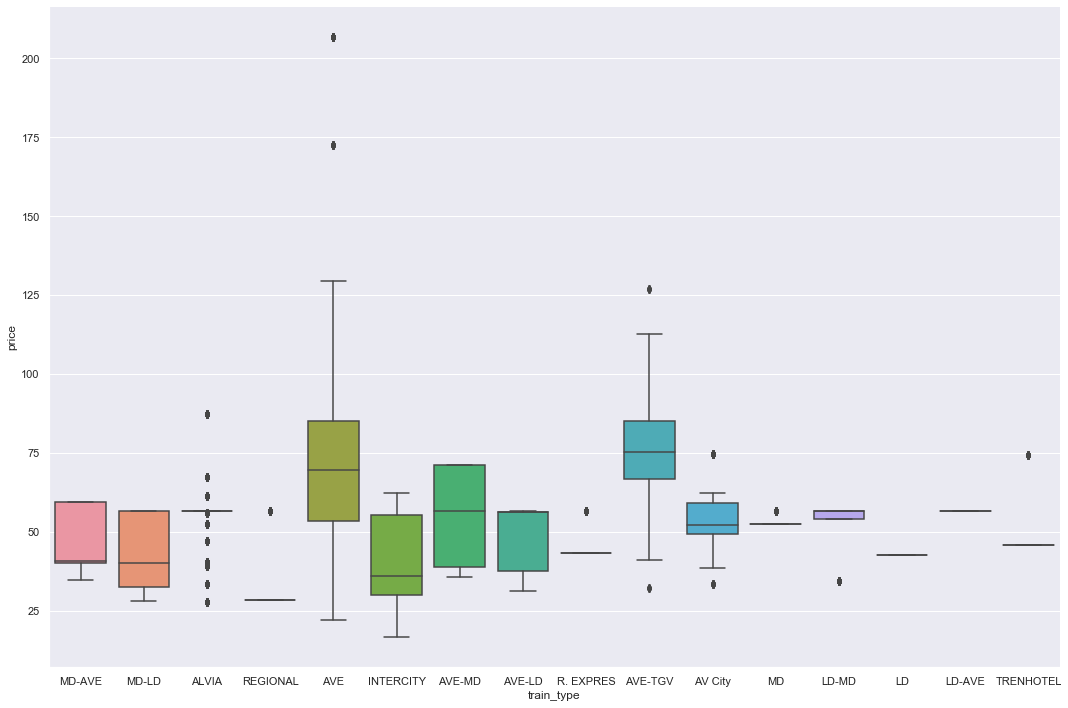

In [134]:
#write code here
sns.catplot(kind='box', x='train_type', y='price', data=df, height=10, aspect=1.5)

**Question: Which type of trains cost more as compared to others?**

**Answer:**  The Train "AVE" cost higher than others with highest outliers 



## Feature Engineering


In [135]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [136]:
#write code here
import datetime

In [137]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [138]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [139]:
df.head()

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333


In [140]:
#write code here
df.drop(["start_date"], axis=1, inplace=True)

In [141]:
df.drop(["end_date"], axis=1, inplace=True)

In [142]:
df.shape

(215266, 8)

In [144]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [145]:
#write code here
df1 = df[(df["origin"]=="MADRID") & (df["destination"]=="SEVILLA")]
df1

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
364,364,MADRID,SEVILLA,AV City,49.150000,Turista,Promo,2.916667
365,365,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.733333
366,366,MADRID,SEVILLA,AVE,69.400000,Preferente,Promo,2.633333
367,367,MADRID,SEVILLA,AVE,76.300000,Turista,Flexible,2.533333
368,368,MADRID,SEVILLA,ALVIA,56.723877,Preferente,Promo,2.600000
...,...,...,...,...,...,...,...,...
215261,215904,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215262,215905,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.533333
215263,215906,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.633333
215264,215907,MADRID,SEVILLA,AVE,47.300000,Turista,Promo,2.666667


#### Task 22: Make a plot for finding out travelling hours for each train type

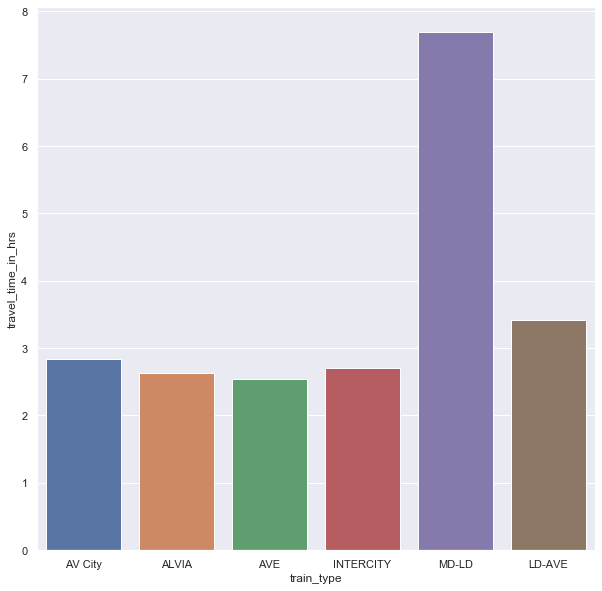

In [146]:
#write code here
sns.barplot(x = 'train_type',y = 'travel_time_in_hrs',data = df1)
 
# Show the plot
plt.show()

#### **Task 23: Show train_type vs price through boxplot**


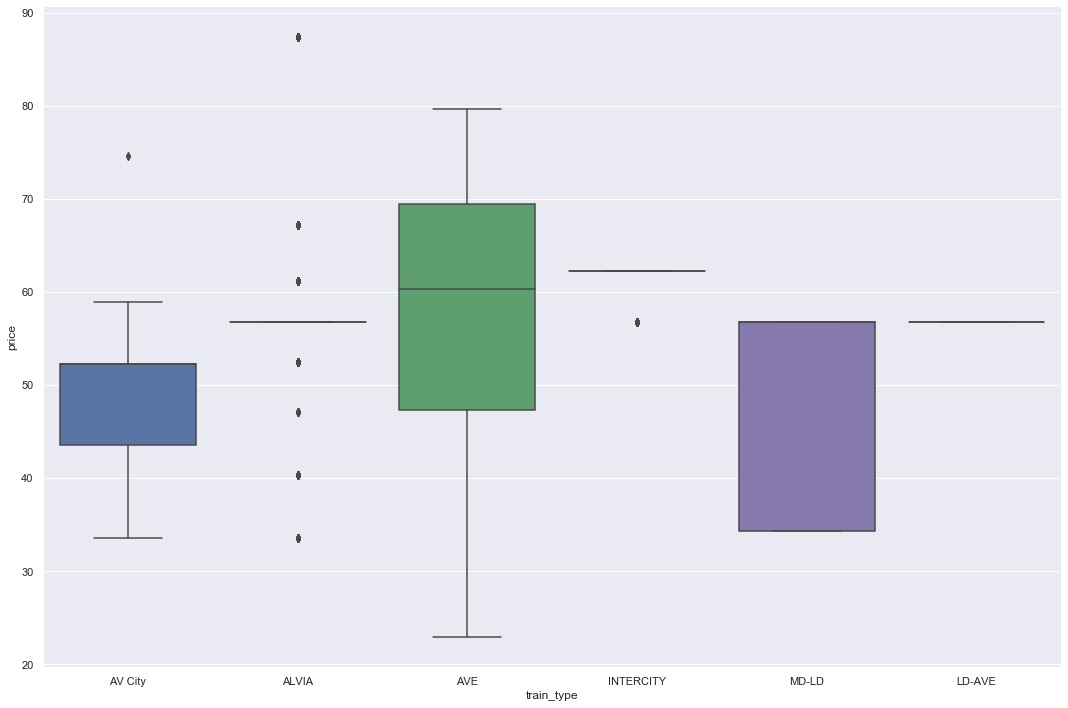

In [147]:
#write code here
sns.catplot(kind='box', x='train_type', y='price', data=df1, height=10, aspect=1.5)

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [148]:
#write code here
df2 = df[(df["origin"]=="MADRID") & (df["destination"]=="BARCELONA")]
df2

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
79,79,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
80,80,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
81,81,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
82,82,MADRID,BARCELONA,R. EXPRES,43.25,Turista,Adulto ida,9.366667
83,83,MADRID,BARCELONA,AVE,66.75,Turista,Promo,3.150000
...,...,...,...,...,...,...,...,...
215085,215728,MADRID,BARCELONA,AVE,80.15,Turista Plus,Promo,2.750000
215086,215729,MADRID,BARCELONA,AVE,98.00,Preferente,Promo,3.166667
215087,215730,MADRID,BARCELONA,AVE,69.80,Turista Plus,Promo,2.833333
215088,215731,MADRID,BARCELONA,AVE,58.15,Turista,Promo,3.166667


#### Task 25: Make a plot for finding out travelling hours for each train type

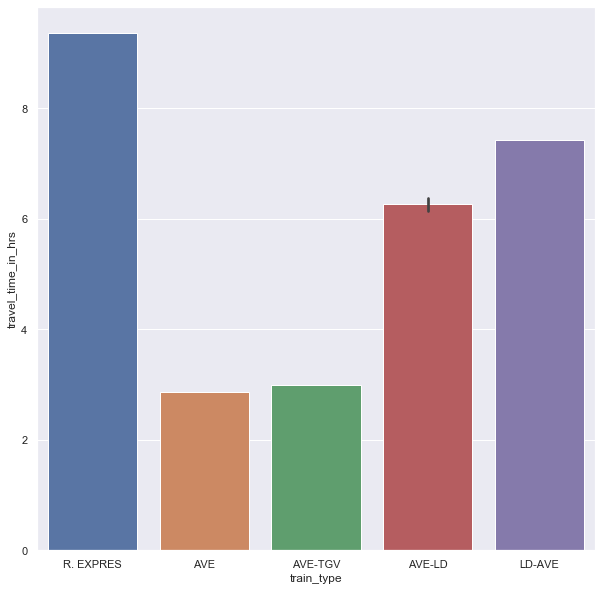

In [149]:
#write code here
sns.barplot(x = 'train_type',y = 'travel_time_in_hrs',data = df2)
 
# Show the plot
plt.show()

#### **Task 26: Show train_type vs price through boxplot**

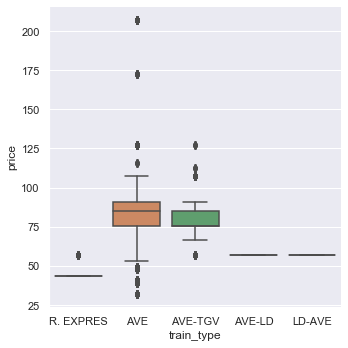

In [150]:
#write code here
sns.catplot(kind='box', x='train_type', y='price', data=df2)

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [151]:
#write code here
df3 = df[(df["origin"]=="MADRID") & (df["destination"]=="VALENCIA")]
df3

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
5,5,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.783333
6,6,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.716667
7,7,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.700000
8,8,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.583333
9,9,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.366667
...,...,...,...,...,...,...,...,...
214830,215473,MADRID,VALENCIA,AVE,33.65,Turista,Promo,1.700000
214831,215474,MADRID,VALENCIA,REGIONAL,28.35,Turista,Adulto ida,6.283333
214832,215475,MADRID,VALENCIA,AVE,39.45,Turista,Promo,1.666667
214833,215476,MADRID,VALENCIA,AVE,45.30,Turista,Promo,1.816667


#### Task 28: Make a plot for finding out travelling hours for each train type

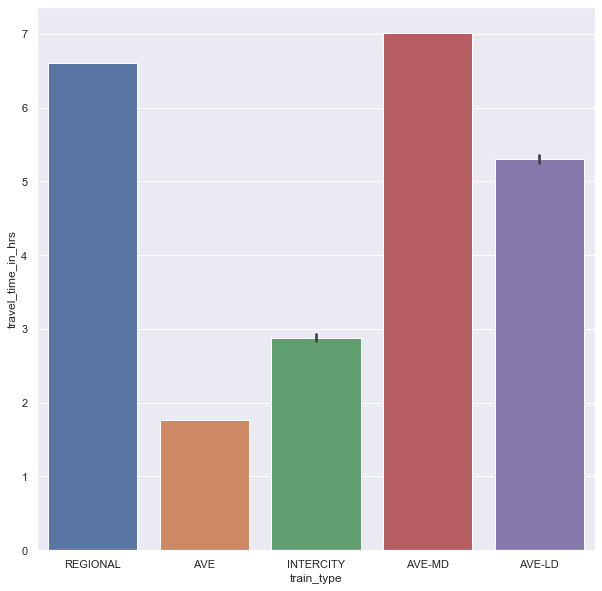

In [152]:
#write code here
sns.barplot(x = 'train_type',y = 'travel_time_in_hrs',data = df3)
 
# Show the plot
plt.show()

#### **Task 29: Show train_type vs price through boxplot**

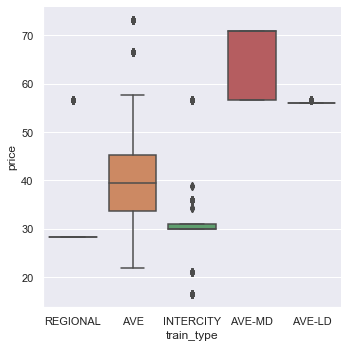

In [153]:
#write code here
sns.catplot(kind='box', x='train_type', y='price', data=df3)


## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [154]:
#write code here
df4 = df[(df["origin"]=="MADRID") & (df["destination"]=="PONFERRADA")]
df4

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
233,233,MADRID,PONFERRADA,AVE-MD,35.750000,Turista con enlace,Promo,3.883333
234,234,MADRID,PONFERRADA,AVE-LD,31.200000,Turista con enlace,Promo,4.200000
235,235,MADRID,PONFERRADA,ALVIA,33.500000,Turista,Promo,4.050000
236,236,MADRID,PONFERRADA,LD-MD,56.723877,Turista con enlace,Promo +,6.533333
237,237,MADRID,PONFERRADA,LD,42.750000,Turista con enlace,Promo +,4.200000
...,...,...,...,...,...,...,...,...
215066,215709,MADRID,PONFERRADA,AVE-LD,31.200000,Turista con enlace,Promo,4.200000
215067,215710,MADRID,PONFERRADA,ALVIA,33.500000,Turista,Promo,4.050000
215068,215711,MADRID,PONFERRADA,LD-MD,56.723877,Turista con enlace,Promo +,6.533333
215069,215712,MADRID,PONFERRADA,LD,42.750000,Turista con enlace,Promo +,4.200000


#### Task 31: Make a plot for finding out travelling hours for each train type

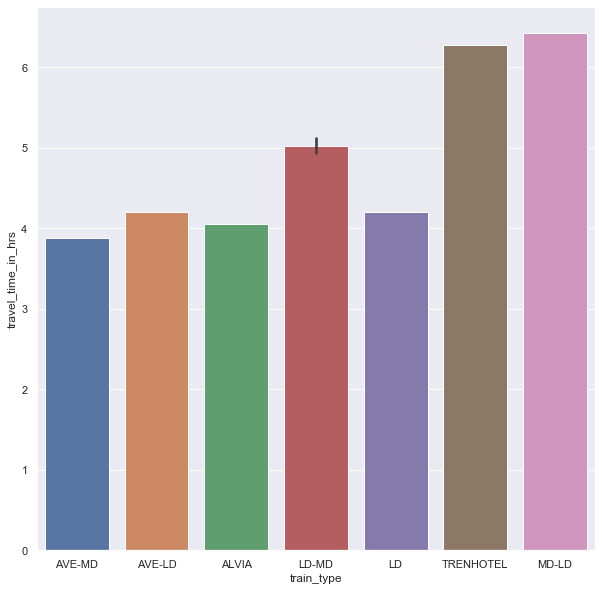

In [155]:
#write code here
#write code here
sns.barplot(x = 'train_type',y = 'travel_time_in_hrs',data = df4)
 
# Show the plot
plt.show()

#### **Task 32: Show train_type vs price through boxplot**

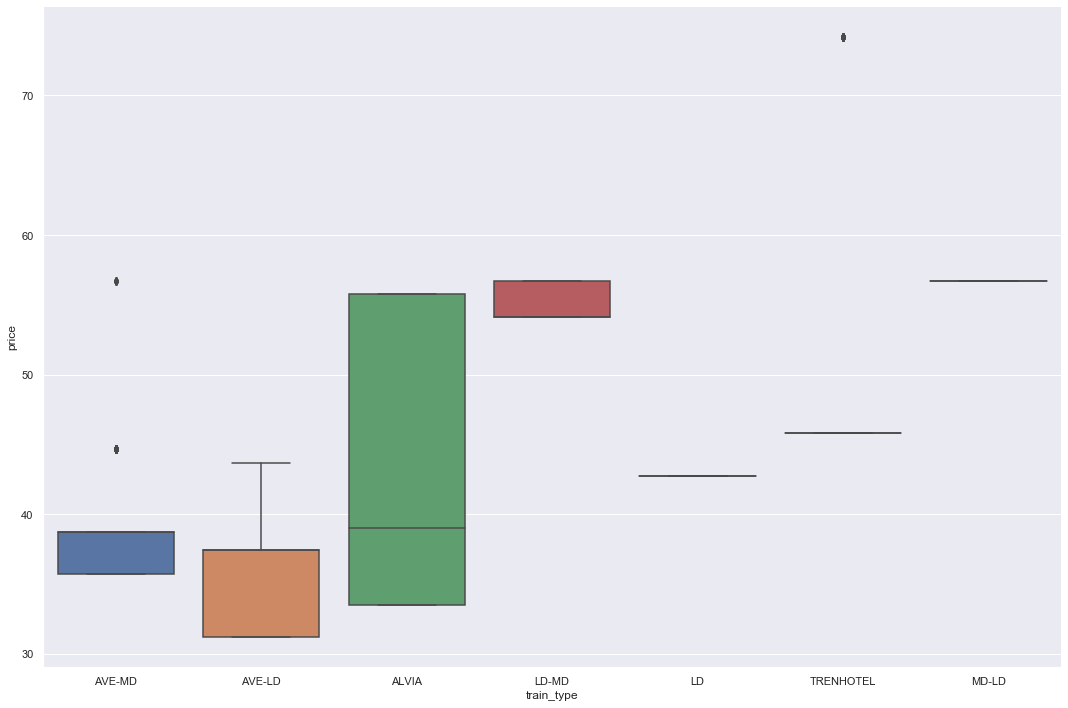

In [156]:
#write code here
sns.catplot(kind='box', x='train_type', y='price', data=df4,  height=10, aspect=1.5)


# Applying Linear  Regression

In [163]:
df.head()

,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,2,1,11,59.50,4,1,4.700000
1,2,1,11,34.65,4,4,5.800000
2,2,1,12,39.95,4,4,5.916667
3,2,1,11,40.60,4,4,4.983333
4,2,1,0,27.90,2,3,4.133333


#### Task 33: Import LabelEncoder library from sklearn 

In [159]:
#write code here
from sklearn import preprocessing

**Data Encoding**

In [160]:
lab_en = preprocessing.LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [162]:
df.drop(['index'], axis=1, inplace= True)

#### Task 34: Separate the dependant and independant variables

In [171]:
#write code here
X = df.drop(['price'], axis=1)
Y = df[["price"]]
print(X.shape)
print(Y.shape)

(215266, 6)
(215266, 1)


#### Task 35: Import test_train_split from sklearn

In [172]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [ ]:
## write code here
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20, random_state=45,shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

#### Task 37: Import LinearRegression library from sklearn

In [191]:
#write code here
from sklearn.linear_model import LinearRegression


#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [192]:
#write code here
lr = LinearRegression()

In [193]:
#write code here
lr.fit(X_train, Y_train)

LinearRegression()

#### Task 39: Find out the predictions using test data set.

In [194]:
#write code here
lr_predict = lr.predict(X_test)
lr_predict

array([[48.28410966],
       [28.42461352],
       [28.60639944],
       ...,
       [56.76486565],
       [33.5845405 ],
       [79.84770281]])

#### Task 40: Find out the predictions using training data set.

In [195]:
#write code here
lr_predict_train = lr.predict(X_train)


#### Task 41: Import r2_score library form sklearn

In [196]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [197]:
#write code here
lr_r2_test=r2_score(Y_test,lr_predict)
lr_r2_test

0.723220515970735

#### Task 43: Find out the R2 Score for training data and print it.

In [189]:
lr_r2_train = r2_score(Y_train,lr_predict_train)
lr_r2_train

0.7250571229406206

Comaparing training and testing R2 scores

In [200]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7250571229406206
R2 score for Linear Regression Testing Data is:  0.723220515970735


# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [199]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [202]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [203]:
#write code here
X_train_poly = poly_reg.fit_transform(X_train)

In [204]:
X_test_poly = poly_reg.fit_transform(X_test)

#### Task 47: Fit the transformed features to Linear Regression

In [207]:
#write code here
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression()

#### Task 48: Find the predictions on the data set

In [209]:
#write code here
y_train_predicted= poly_model.predict(X_train_poly)
y_test_predict =  poly_model.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

In [211]:
#evaluating the model on training dataset
#write code here
r2_train = r2_score(Y_train, y_train_predicted)
r2_train

0.8211580573762667

#### Task 50: Evaluate R2 score for test data set

In [215]:
# evaluating the model on test dataset
#write code here
r2_test = r2_score(Y_test, y_test_predict)
r2_test

0.8174141683613698

Comaparing training and testing R2 scores

In [216]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8211580573762667
The r2 score for testing set is:  0.8174141683613698


#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [221]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted= poly.predict(X_tr_poly)
    y_tst_predict = poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7275246013681849, 0.8211580573762667, 0.845973695758847, 0.8638136912846885, 0.8699016929629838]
R2 Test [0.7232205159707374, 0.8174141683613698, 0.8418781120028614, -2.004176029320205, -1850002.525515122]


#### Plotting the model

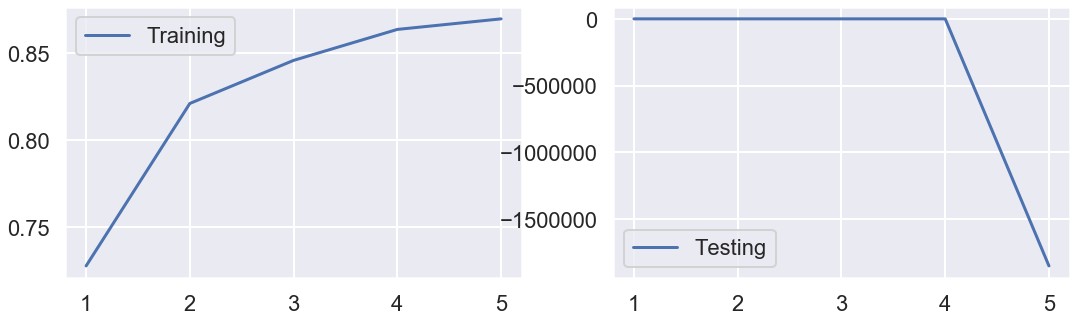

In [222]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**

As it is clearly seen from graph that increasing the degree from 1 to 2 it has increased the training score 72.75 % to 82.11 so does tesing R2 score of 72.32 to 81.74

We know the limitation of R2 score that with the increase of features R2 score increases so with Degree 3,4 and 5 the raining R2 has increased from 84.59%, 86.38136912846885%, 86.99016929629838% respectively

Whearas the testing score on degree 3 has increased to 84.18781120028614% but on degree 4 the R2 score of testing fell to -2.004176029320205% and further -1850002.525515122